In [1]:
!pip install pandas

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import cartopy.crs
%matplotlib inline

In [3]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [4]:
data=pd.read_csv('passive margin age depth model rankings.csv')

In [5]:
lats=data['Latitude']
longs=data['Longitude']
name=data['Name']
rank=data['Rank']
model_status=data['Neptune']

In [6]:
data2=pd.read_csv('passive margin age depth model rankings alt.csv')

In [7]:
#with NSB models
NSB_rank1_lats=data2['NSP_1_Latitude']
NSB_rank1_longs=data2['NSP_1_Longitude']
NSB_rank1_name=data2['NSP_1_Name']

NSB_rank2_lats=data2['NSP_2_Latitude']
NSB_rank2_longs=data2['NSP_2_Longitude']
NSB_rank2_name=data2['NSP_2_Name']

NSB_rank3_lats=data2['NSP_3_Latitude']
NSB_rank3_longs=data2['NSP_3_Longitude']
NSB_rank3_name=data2['NSP_3_Name']

In [8]:
#without NSB model
noNSB_rank1_lats=data2['nonNSP_1_Latitude']
noNSB_rank1_longs=data2['nonNSP_1_Longitude']
noNSB_rank1_name=data2['nonNSP_1_Name']

noNSB_rank2_lats=data2['nonNSP_2_Latitude']
noNSB_rank2_longs=data2['nonNSP_2_Longitude']
noNSB_rank2_name=data2['nonNSP_2_Name']

noNSB_rank3_lats=data2['nonNSP_3_Latitude']
noNSB_rank3_longs=data2['nonNSP_3_Longitude']
noNSB_rank3_name=data2['nonNSP_3_Name']

In [9]:
#GSL=pd.read_csv('passive margin age depth model rankings.csv', sep=',')

In [10]:
#database=np.unique(GSL.Database)
#database

In [20]:
#rank by plot symbol
for i in xrange(len(rank)):
    rank[i]=rank[i].replace('1','o')
    rank[i]=rank[i].replace('2','x')
    rank[i]=rank[i].replace('3','+')

AttributeError: 'numpy.int64' object has no attribute 'replace'

In [ ]:
#colour by model availability
for i in xrange(len(model_status)):
    model_status[i]=model_status[i].replace('0','blue')
    model_status[i]=model_status[i].replace('1','red')

In [29]:
#map from data(1) - this plan doesn't work
'''
fig = plt.figure(figsize=(16,12),dpi=150)

ax = plt.axes(projection=cartopy.crs.PlateCarree())
#Robinson looks nice (curved)
#Also could use PlateCarree or Mercator, both of these are supported with gridline labels

#Earth-specific details from cartopy module
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
#ax.stock_img() #for coloured map
ax.gridlines()#draw_labels=True for gridline labels on supported projections above

#data into map
mapscat=ax.scatter(longs,lats,marker=rank ,color=mapscat=ax.scatter(longs,lats,marker=rank ,color=,transform=cartopy.crs.PlateCarree(),zorder=4,label=name)

#plt.legend(title='gg')#,loc='lower right',bbox_to_anchor=(1.5, -0.6))


#cbar=plt.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
#cbar.set_label('Published age-depth model quality (1=better)')

plt.title('gg')

#grid lines and labels

gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


plt.show()
'''

SyntaxError: invalid syntax (<ipython-input-29-1cacadb8abed>, line 15)

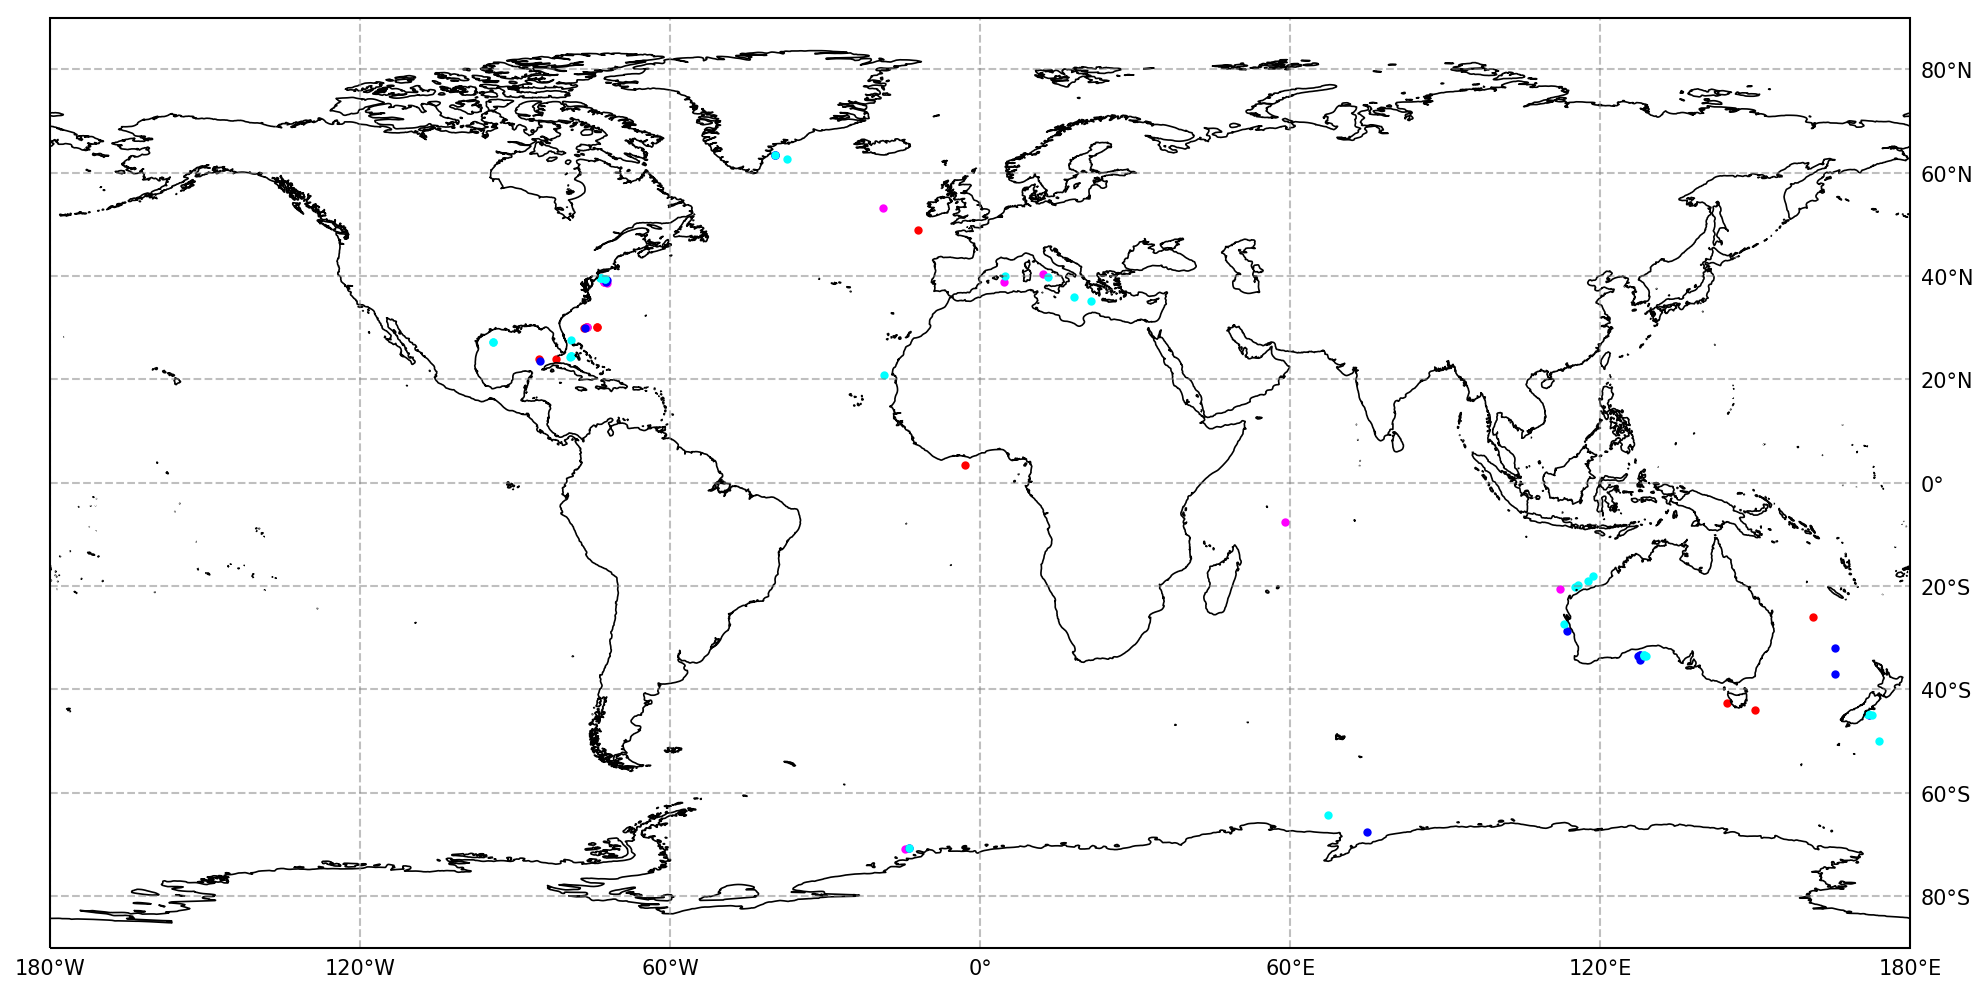

In [28]:
#map from data2 all
fig = plt.figure(figsize=(16,12),dpi=150)

ax = plt.axes(projection=cartopy.crs.PlateCarree())
#Robinson looks nice (curved)
#Also could use PlateCarree or Mercator, both of these are supported with gridline labels

#Earth-specific details from cartopy module
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
#ax.stock_img() #for coloured map
#ax.gridlines()#draw_labels=True for gridline labels on supported projections above

#data into map
#NSB models available
mapscat=ax.scatter(NSB_rank2_longs, NSB_rank2_lats,marker=".",color=['red'],transform=cartopy.crs.PlateCarree(),label=NSB_rank2_name)
mapscat=ax.scatter(NSB_rank3_longs, NSB_rank3_lats,marker=".",color=['magenta'],transform=cartopy.crs.PlateCarree(),label=NSB_rank3_name)

#no NSB models
mapscat=ax.scatter(noNSB_rank2_longs, noNSB_rank2_lats,marker=".",color=['blue'],transform=cartopy.crs.PlateCarree(),label=noNSB_rank2_name)
mapscat=ax.scatter(noNSB_rank3_longs, noNSB_rank3_lats,marker=".",color=['cyan'],transform=cartopy.crs.PlateCarree(),label=noNSB_rank3_name)


#plt.legend(title='gg')#,loc='lower right',bbox_to_anchor=(1.5, -0.6))


#cbar=plt.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
#cbar.set_label('Published age-depth model quality (1=better)')

#plt.title('')

#grid lines and labels

gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


plt.show()

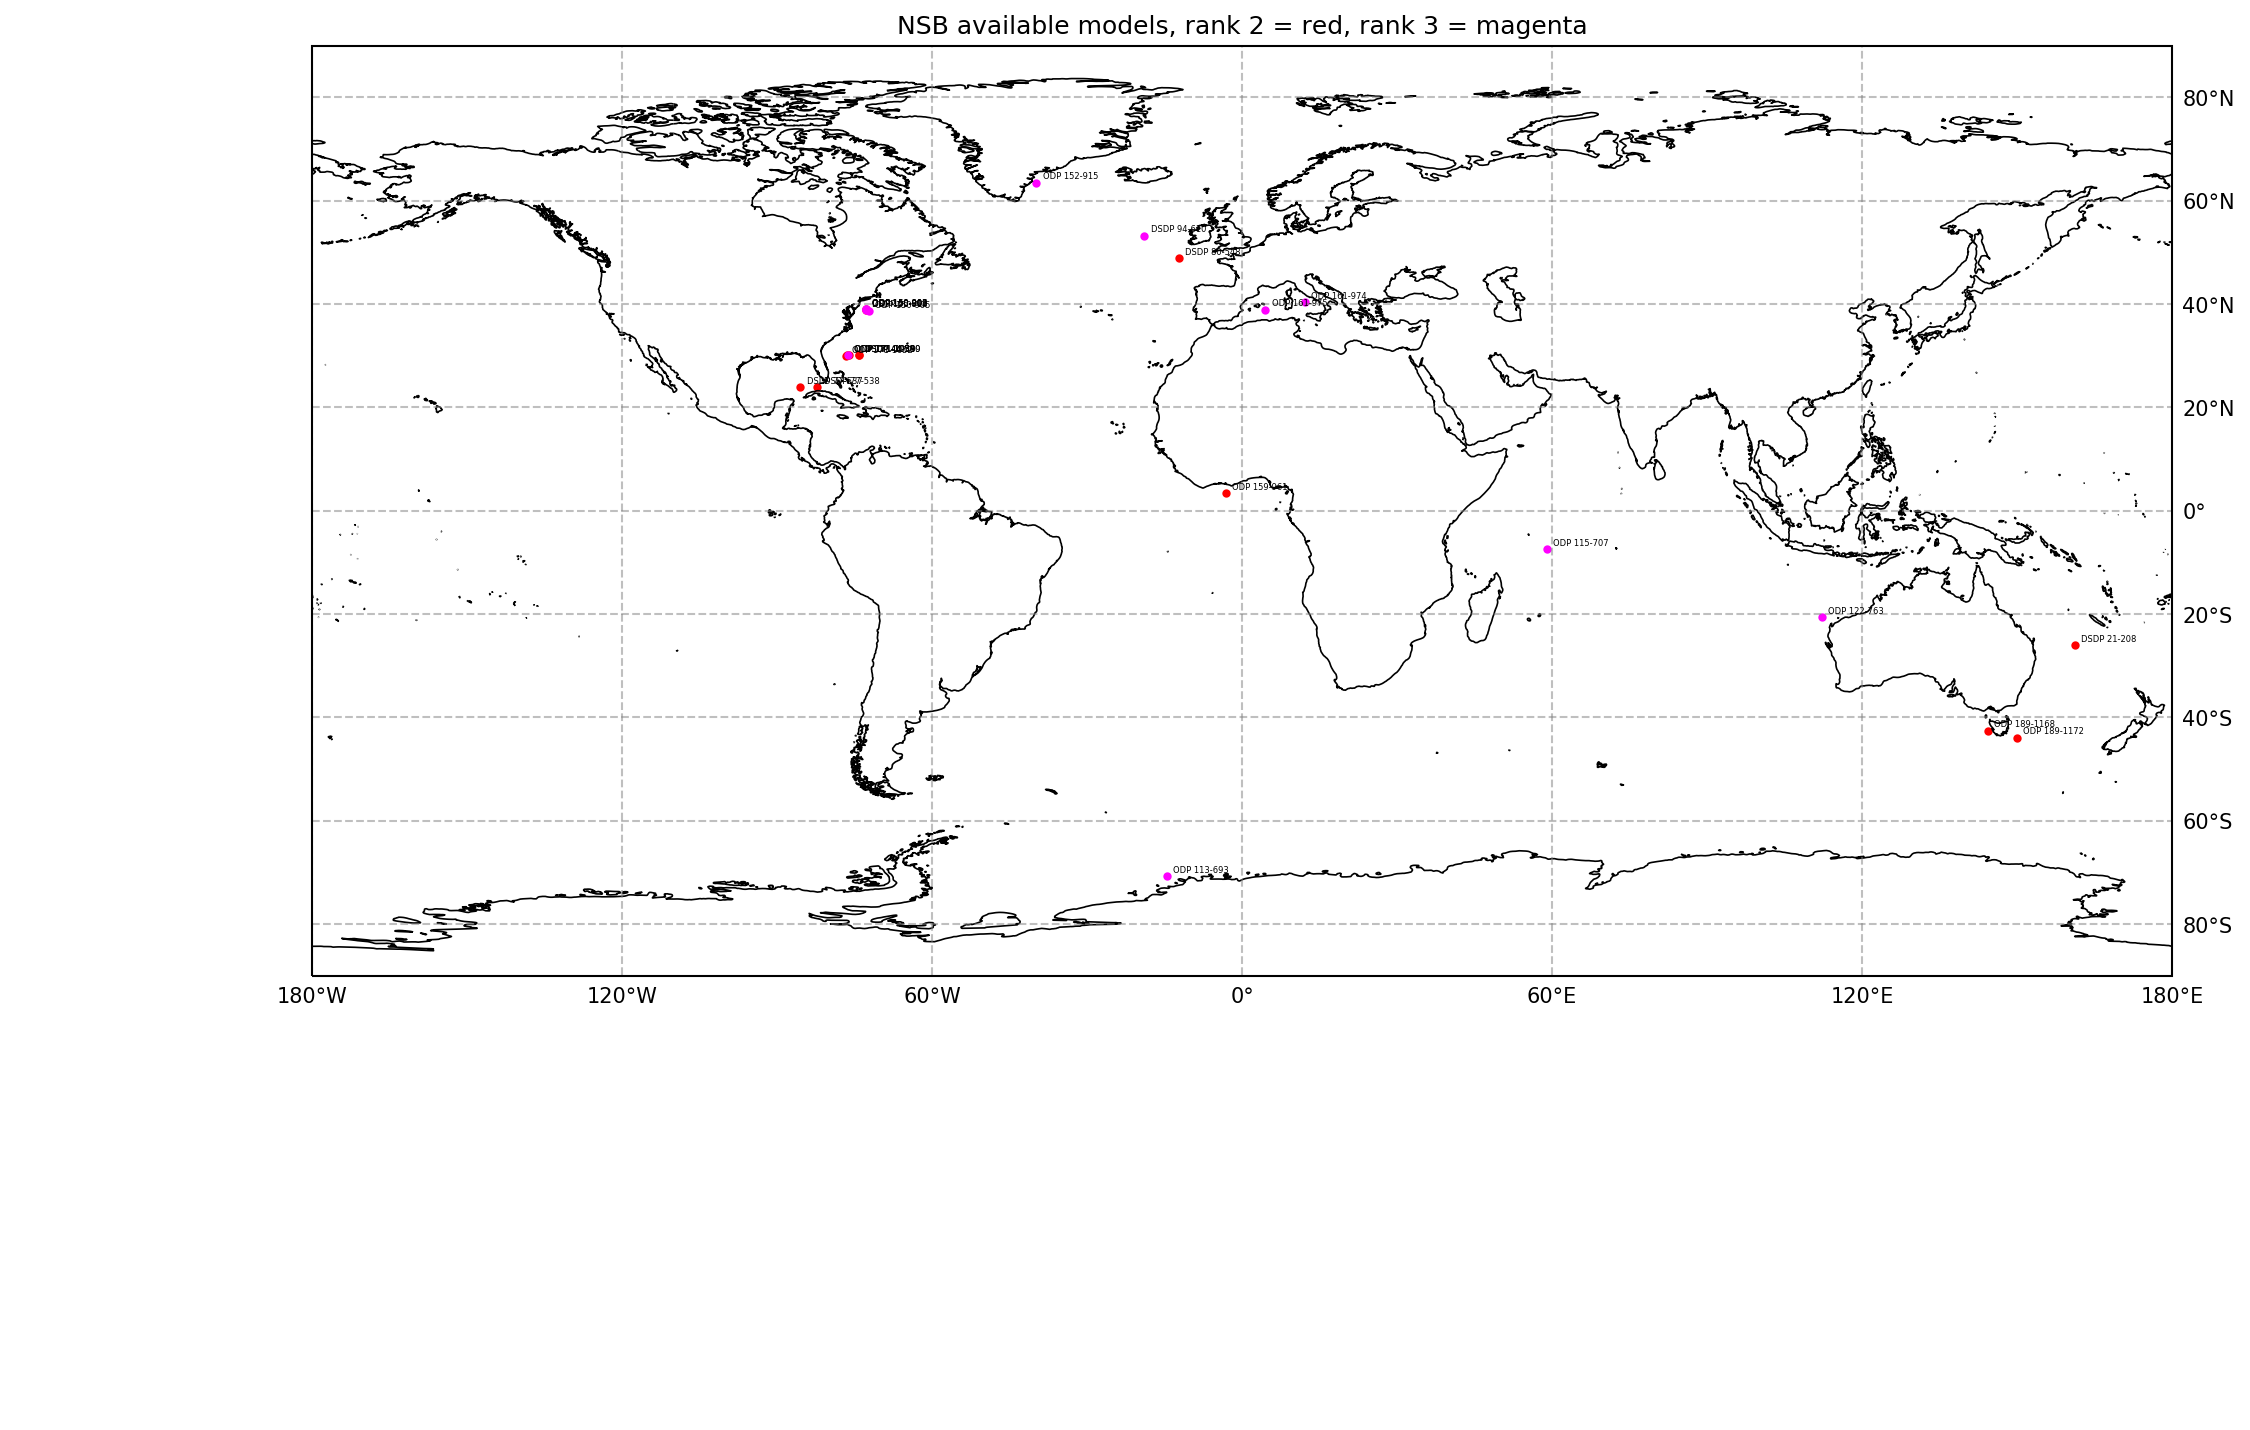

In [41]:
#map from data2 - NSB only
fig = plt.figure(figsize=(16,12),dpi=150)

ax = plt.axes(projection=cartopy.crs.PlateCarree())
#Robinson looks nice (curved)
#Also could use PlateCarree or Mercator, both of these are supported with gridline labels

#Earth-specific details from cartopy module
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
#ax.stock_img() #for coloured map
#ax.gridlines()#draw_labels=True for gridline labels on supported projections above

#NSB models available
mapscat=ax.scatter(NSB_rank2_longs, NSB_rank2_lats,marker=".",color=['red'],transform=cartopy.crs.PlateCarree(),label=NSB_rank2_name)
mapscat=ax.scatter(NSB_rank3_longs, NSB_rank3_lats,marker=".",color=['magenta'],transform=cartopy.crs.PlateCarree(),label=NSB_rank3_name)

#no NSB models
#mapscat=ax.scatter(noNSB_rank2_longs, noNSB_rank2_lats,marker=".",color=['blue'],transform=cartopy.crs.PlateCarree(),label=noNSB_rank2_name)
#mapscat=ax.scatter(noNSB_rank3_longs, noNSB_rank3_lats,marker=".",color=['cyan'],transform=cartopy.crs.PlateCarree(),label=noNSB_rank3_name)


#plt.legend(title='')#,loc='lower right',bbox_to_anchor=(1.5, -0.6))


#cbar=plt.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
#cbar.set_label('Published age-depth model quality (1=better)')

plt.title('NSB available models, rank 2 = red, rank 3 = magenta')

#grid lines and labels
gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#labels
for i, txt in enumerate(NSB_rank2_name):
    ax.annotate(txt, (NSB_rank2_longs[i], NSB_rank2_lats[i]), size=4, xytext=(3,2), ha='left', textcoords='offset points')

for i, txt in enumerate(NSB_rank3_name):
    ax.annotate(txt, (NSB_rank3_longs[i], NSB_rank3_lats[i]), size=4, xytext=(3,2), ha='left', textcoords='offset points')


plt.show()

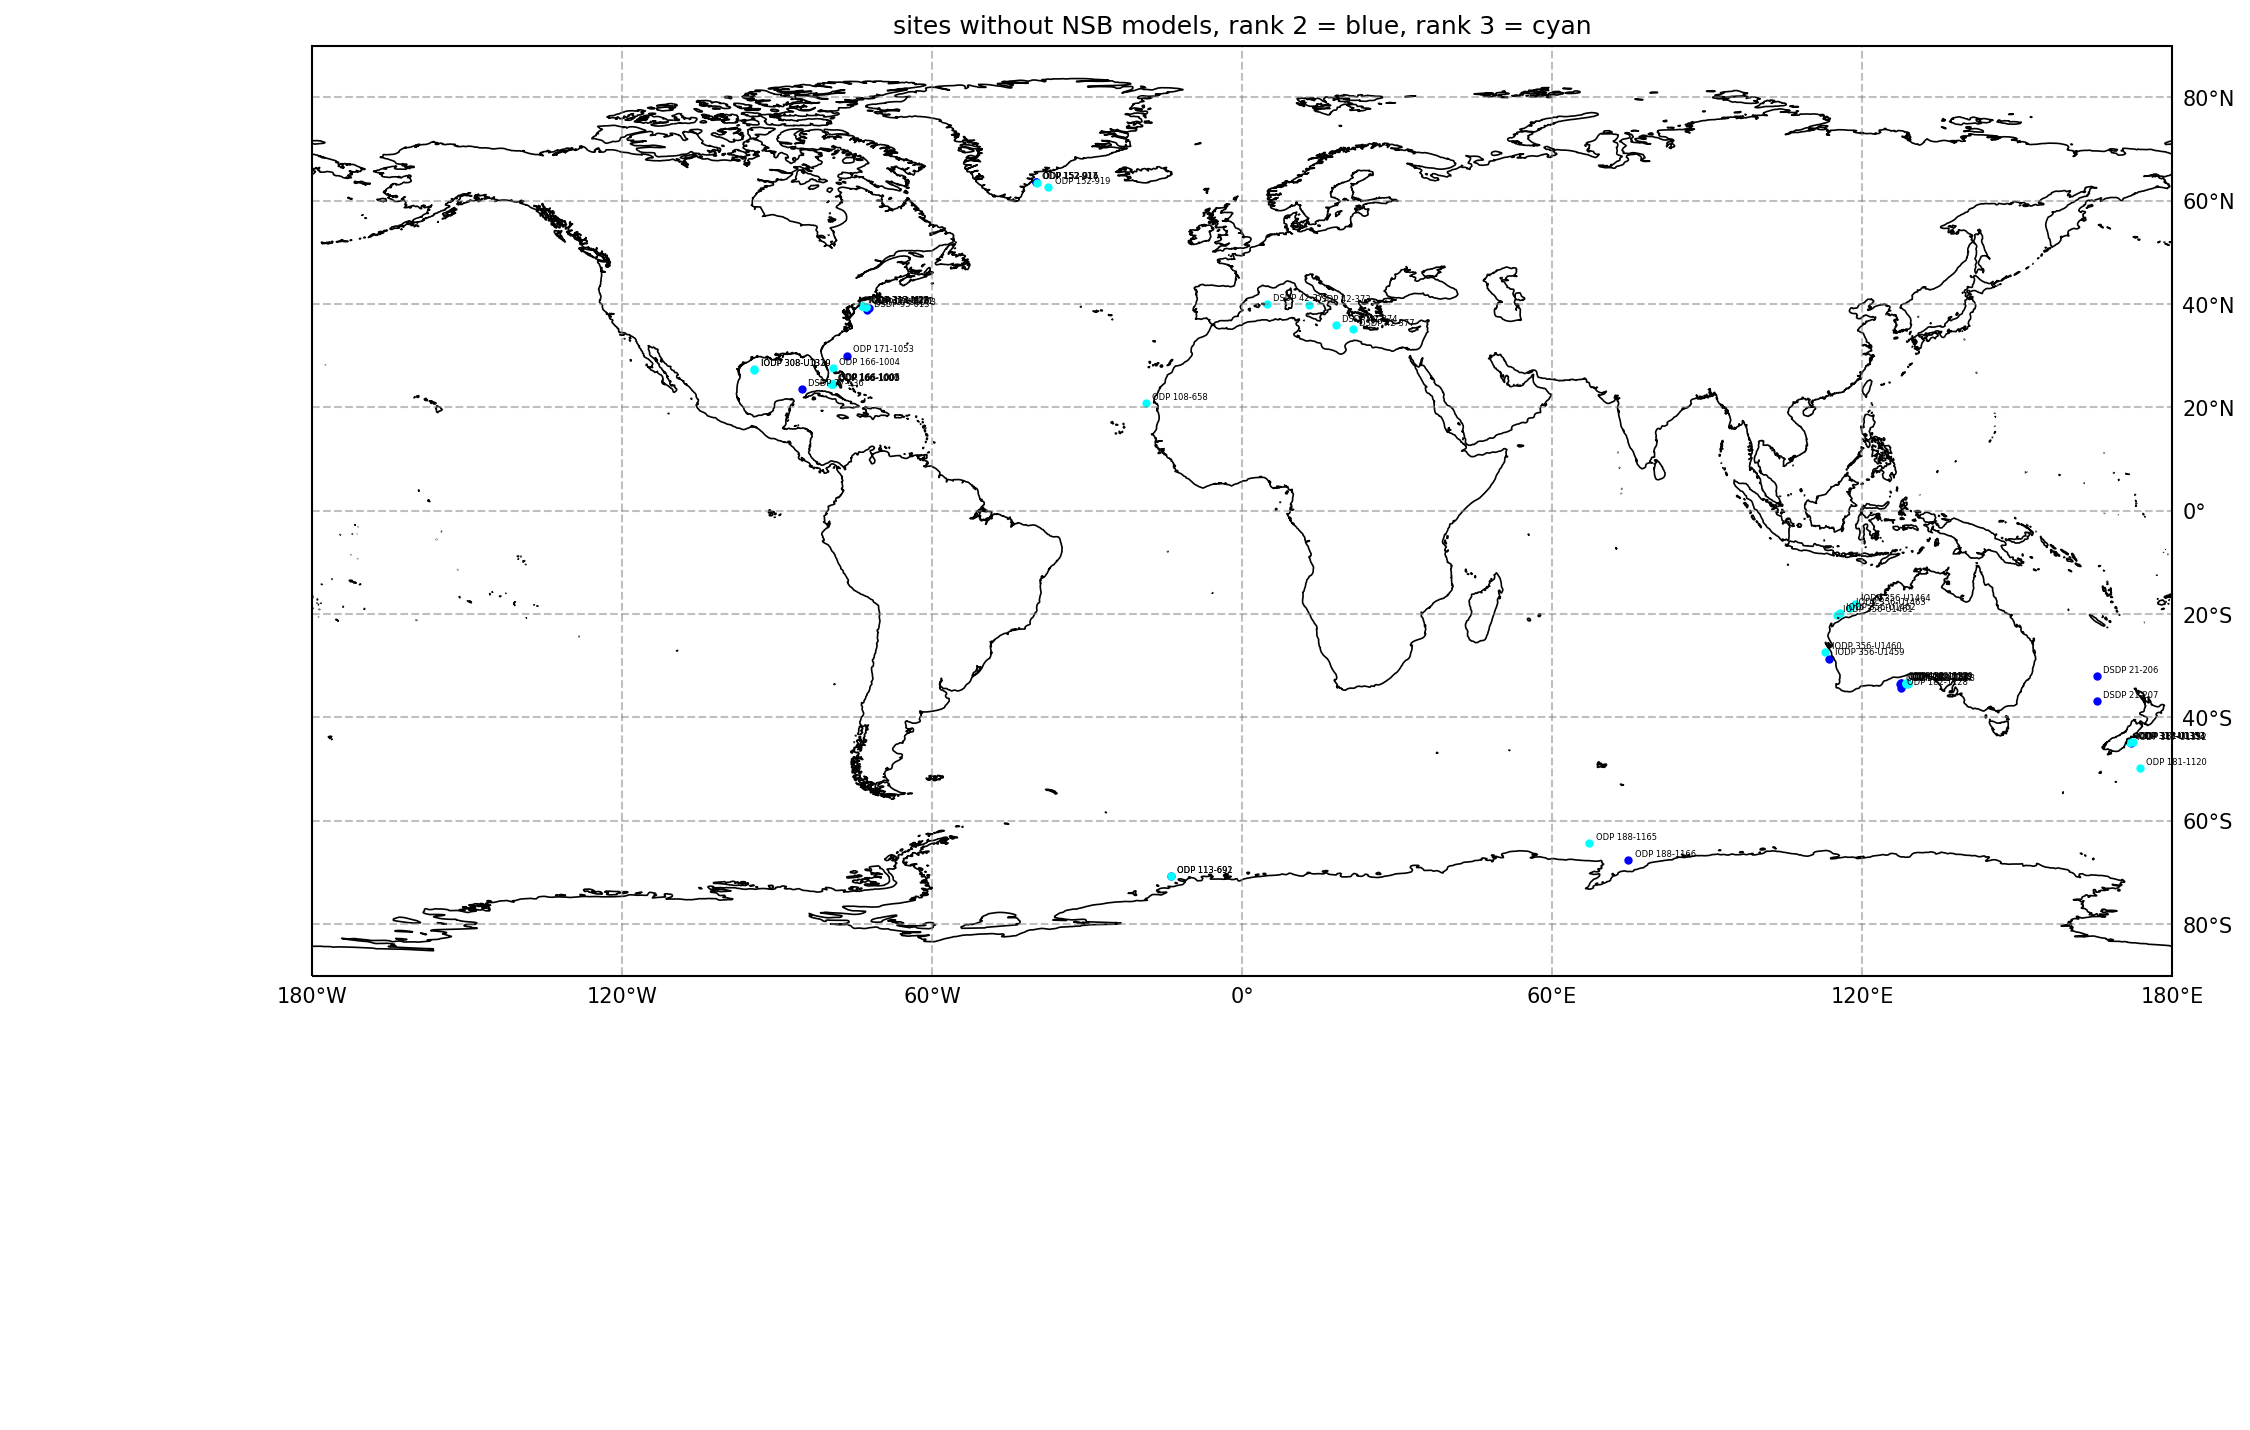

In [42]:
#map from data2 - NSB only
fig = plt.figure(figsize=(16,12),dpi=150)

ax = plt.axes(projection=cartopy.crs.PlateCarree())
#Robinson looks nice (curved)
#Also could use PlateCarree or Mercator, both of these are supported with gridline labels

#Earth-specific details from cartopy module
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
#ax.stock_img() #for coloured map
#ax.gridlines()#draw_labels=True for gridline labels on supported projections above

#NSB models available
#mapscat=ax.scatter(NSB_rank2_longs, NSB_rank2_lats,marker=".",color=['red'],transform=cartopy.crs.PlateCarree(),label=NSB_rank2_name)
#mapscat=ax.scatter(NSB_rank3_longs, NSB_rank3_lats,marker=".",color=['magenta'],transform=cartopy.crs.PlateCarree(),label=NSB_rank3_name)

#no NSB models
mapscat=ax.scatter(noNSB_rank2_longs, noNSB_rank2_lats,marker=".",color=['blue'],transform=cartopy.crs.PlateCarree(),label=noNSB_rank2_name)
mapscat=ax.scatter(noNSB_rank3_longs, noNSB_rank3_lats,marker=".",color=['cyan'],transform=cartopy.crs.PlateCarree(),label=noNSB_rank3_name)


#plt.legend(title='gg')#,loc='lower right',bbox_to_anchor=(1.5, -0.6))


#cbar=plt.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
#cbar.set_label('Published age-depth model quality (1=better)')

plt.title('sites without NSB models, rank 2 = blue, rank 3 = cyan')

#grid lines and labels
gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#labels
for i, txt in enumerate(noNSB_rank2_name):
    ax.annotate(txt, (noNSB_rank2_longs[i], noNSB_rank2_lats[i]), size=4, xytext=(3,2), ha='left', textcoords='offset points')

for i, txt in enumerate(noNSB_rank3_name):
    ax.annotate(txt, (noNSB_rank3_longs[i], noNSB_rank3_lats[i]), size=4, xytext=(3,2), ha='left', textcoords='offset points')



plt.show()